In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
import seaborn as sns 
from collections import defaultdict, Counter

# Análisis Estadístico 

## Dataset limpio cargado

In [5]:
df_cleaned

,price,rooms,baths,sqft,address
0,1920000,3,3,183,Recoletos
1,1995000,3,3,170,Castellana
2,1300000,4,3,270,Hortaleza
3,1650000,3,3,248,Chamartín
4,1590750,3,3,116,Recoletos
5,1590000,5,4,360,Cuatro Caminos
6,5700000,4,5,305,Recoletos
7,2190000,4,4,183,Goya
8,1190000,2,2,112,Goya
9,675000,3,2,153,Aravaca


## Estadísticos descriptivos (Media y Mediana)

In [10]:
media = df[['price', 'rooms', 'baths', 'sqft']].mean()
mediana = df[['price', 'rooms', 'baths', 'sqft']].median()

print(f"Media:\n{media}\n")
print(f"Mediana:\n{mediana}\n")

Media:
price    1.290575e+06
rooms    3.474317e+00
baths    2.900546e+00
sqft     2.172383e+02
dtype: float64

Mediana:
price    990000.0
rooms         3.0
baths         3.0
sqft        158.0
dtype: float64



## Estadísticos descriptivos (Máximo y Mínimo)

In [11]:
maximos = df[['price', 'rooms', 'baths', 'sqft']].max()
minimos = df[['price', 'rooms', 'baths', 'sqft']].min()

print(f"Máximos:\n{maximos}\n")
print(f"Mínimos:\n{minimos}\n")

Máximos:
price    8900000
rooms         12
baths         12
sqft        1768
dtype: int64

Mínimos:
price    122000
rooms         0
baths         1
sqft         14
dtype: int64



## Obtención del Histograma y Curva de Densidad

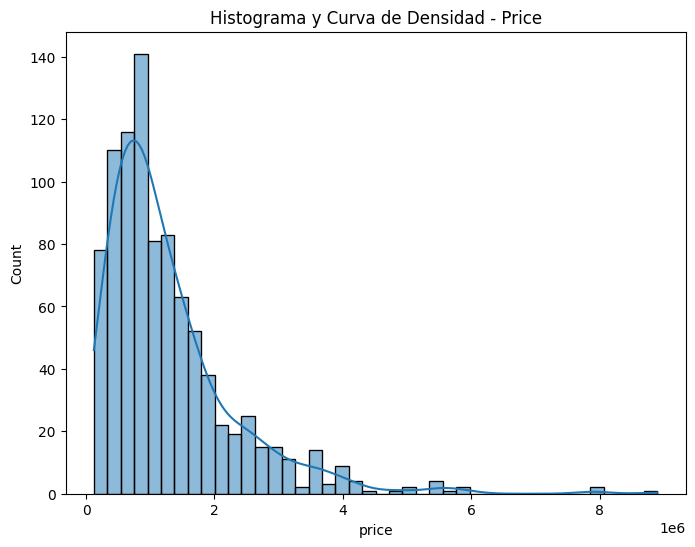

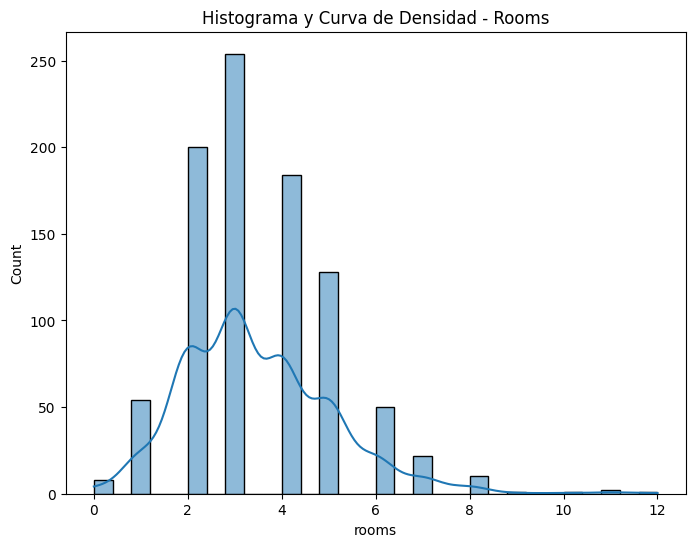

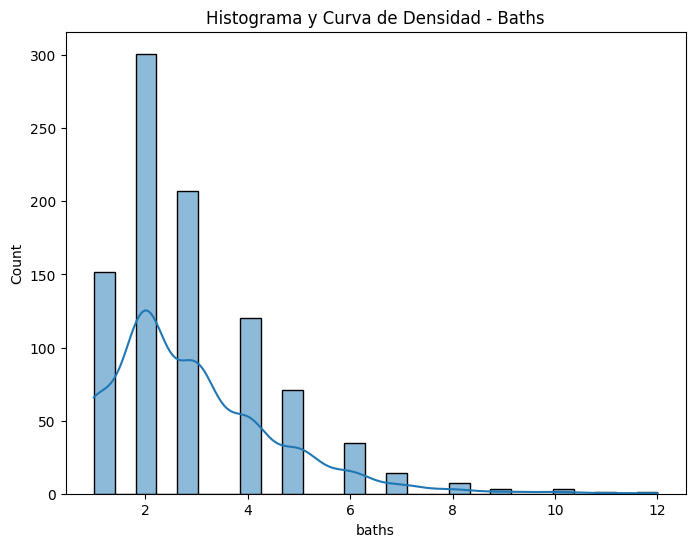

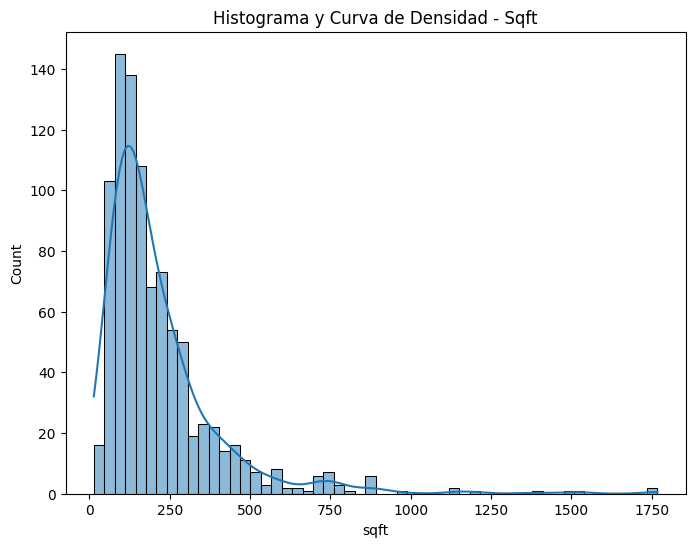

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

columnas = ['price', 'rooms', 'baths', 'sqft']

for col in columnas:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma y Curva de Densidad - {col.capitalize()}')
    plt.show()

## Obtención de los Cuartiles (Q1, Q2 y Q3)

In [14]:
Q1 = df[['price', 'rooms', 'baths', 'sqft']].quantile(0.25)
Q2 = df[['price', 'rooms', 'baths', 'sqft']].quantile(0.5)  # Q2 es la mediana
Q3 = df[['price', 'rooms', 'baths', 'sqft']].quantile(0.75)

print(f"Q1 (25%):\n{Q1}\n")
print(f"Q2 (50% - Mediana):\n{Q2}\n")
print(f"Q3 (75%):\n{Q3}\n")

Q1 (25%):
price    625000.0
rooms         2.0
baths         2.0
sqft        104.0
Name: 0.25, dtype: float64

Q2 (50% - Mediana):
price    990000.0
rooms         3.0
baths         3.0
sqft        158.0
Name: 0.5, dtype: float64

Q3 (75%):
price    1650000.0
rooms          4.0
baths          4.0
sqft         264.0
Name: 0.75, dtype: float64



## Rango Intercuartil (IQR)

In [15]:
IQR = Q3 - Q1
print(f"IQR:\n{IQR}\n")

IQR:
price    1025000.0
rooms          2.0
baths          2.0
sqft         160.0
dtype: float64



## Filtrar el 20% más caro y el 20% más barato

In [16]:
top_20_percent = df[df['price'] > df['price'].quantile(0.80)]
bottom_20_percent = df[df['price'] < df['price'].quantile(0.20)]

print(f"Top 20% Más Caro:\n{top_20_percent.head()}\n")
print(f"Bottom 20% Más Barato:\n{bottom_20_percent.head()}\n")

Top 20% Más Caro:
      price  rooms  baths  sqft     address
0   1920000      3      3   183   Recoletos
1   1995000      3      3   170  Castellana
6   5700000      4      5   305   Recoletos
7   2190000      4      4   183        Goya
10  3950000      4      5   291   Recoletos

Bottom 20% Más Barato:
     price  rooms  baths  sqft          address
35  470000      3      2    95       Fuencarral
36  475000      3      2   112         Comillas
47  380000      3      1    75  Palos de Moguer
57  325000      2      1    76    Bellas Vistas
64  320000      2      1    52          Palacio



## Moda de los barrios

In [18]:
moda_address = df['address'].mode()[0]
print(f"La moda de los barrios es: {moda_address}")

La moda de los barrios es: Barrio de Salamanca


## Moda de los barrios más caros y moda de los barrios más baratos

In [19]:
barrios_caros = df[df['price'] > df['price'].quantile(0.80)]

moda_barrios_baratos = barrios_baratos['neighborhood'].mode()[0]
moda_barrios_caros = barrios_caros['neighborhood'].mode()[0]

print(f"Moda de los barrios más baratos: {moda_barrios_baratos}")
print(f"Moda de los barrios más caros: {moda_barrios_caros}")

Moda de los barrios más baratos: Lavapiés-Embajadores
Moda de los barrios más caros: Barrio de Salamanca


## Obtención de la Varianza y Desviación estándar o típica

In [20]:
varianza = df[['price', 'rooms', 'baths', 'sqft']].var()
desviacion_estandar = df[['price', 'rooms', 'baths', 'sqft']].std()

print(f"Varianza:\n{varianza}\n")
print(f"Desviación Estándar:\n{desviacion_estandar}\n")

Varianza:
price    1.074623e+12
rooms    2.542830e+00
baths    2.645459e+00
sqft     3.676646e+04
dtype: float64

Desviación Estándar:
price    1.036640e+06
rooms    1.594625e+00
baths    1.626487e+00
sqft     1.917458e+02
dtype: float64



## Tukey y Outliers

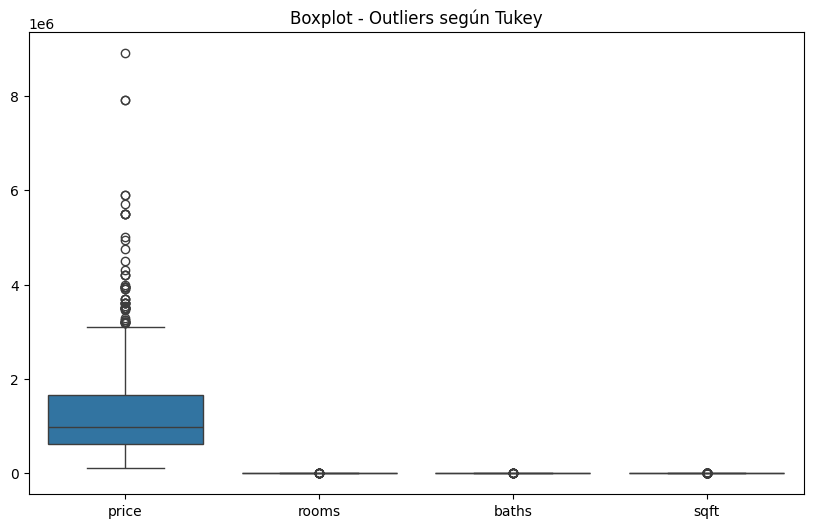

In [21]:
Q1 = df[['price', 'rooms', 'baths', 'sqft']].quantile(0.25)
Q3 = df[['price', 'rooms', 'baths', 'sqft']].quantile(0.75)
IQR = Q3 - Q1
outliers_tukey = df[(df[['price', 'rooms', 'baths', 'sqft']] < (Q1 - 1.5 * IQR)) | (df[['price', 'rooms', 'baths', 'sqft']] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['price', 'rooms', 'baths', 'sqft']])
plt.title("Boxplot - Outliers según Tukey")
plt.show()

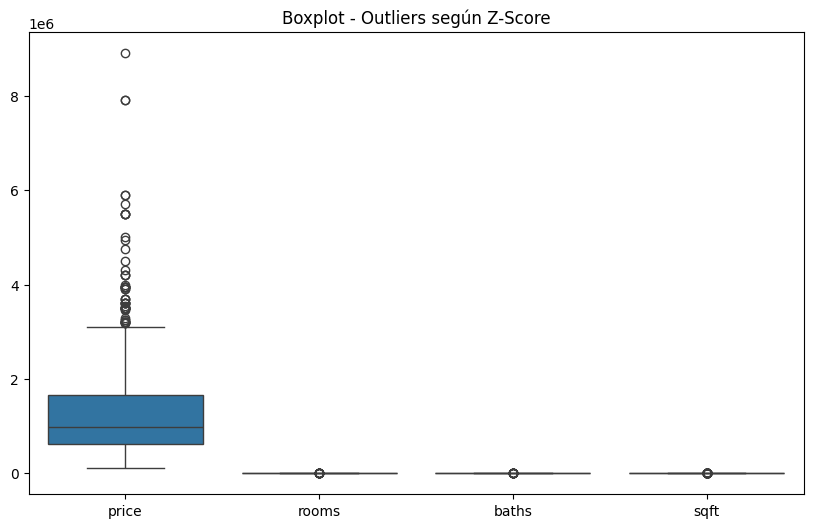

In [22]:
from scipy.stats import zscore

# Calcular Z-Score
z_scores = zscore(df[['price', 'rooms', 'baths', 'sqft']])

# Filtrar los outliers (Z-Score > 3 o Z-Score < -3)
outliers_zscore = df[(z_scores > 3) | (z_scores < -3)]

# Visualización de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['price', 'rooms', 'baths', 'sqft']])
plt.title("Boxplot - Outliers según Z-Score")
plt.show()

## Z-score

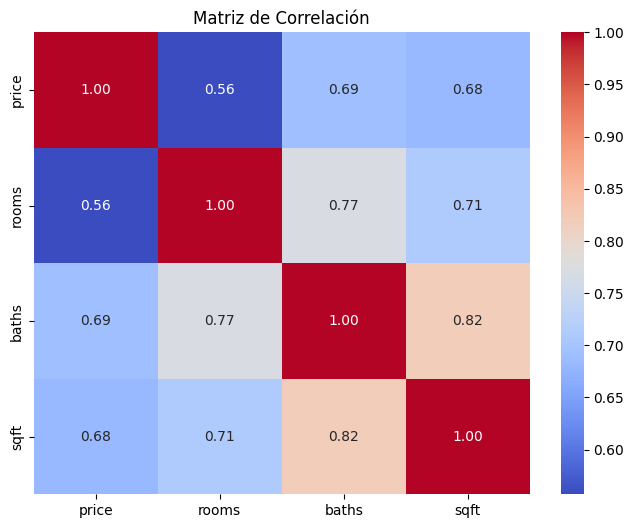

In [23]:
correlation_matrix = df[['price', 'rooms', 'baths', 'sqft']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

## Estandarización

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['price', 'rooms', 'baths', 'sqft']] = scaler.fit_transform(df[['price', 'rooms', 'baths', 'sqft']])

print(df[['price', 'rooms', 'baths', 'sqft']].head())

      price    rooms    baths      sqft
0  0.607510 -0.29761  0.06118 -0.178658
1  0.679898 -0.29761  0.06118 -0.246493
2  0.009097  0.32984  0.06118  0.275316
3  0.346910 -0.29761  0.06118  0.160518
4  0.289723 -0.29761  0.06118 -0.528270


## Asímetria y Curtosis 

In [28]:
from scipy.stats import skew, kurtosis

asimetria = df[['price', 'rooms', 'baths', 'sqft']].apply(skew)
curtosis_valores = df[['price', 'rooms', 'baths', 'sqft']].apply(kurtosis)

print(f"Asimetría:\n{asimetria}\n")
print(f"Curtosis:\n{curtosis_valores}\n")

Asimetría:
price    2.299673
rooms    0.884209
baths    1.406223
sqft     3.358507
dtype: float64

Curtosis:
price     8.547212
rooms     1.900263
baths     3.038920
sqft     17.229111
dtype: float64



## Transformar distribuciones 

In [29]:
import numpy as np

df['log_price'] = np.log(df['price'])
df['log_sqft'] = np.log(df['sqft'] + 1)  # +1 para evitar log(0)

print(df[['log_price', 'log_sqft']].head())

   log_price  log_sqft
0  -0.498387 -0.196816
1  -0.385812 -0.283018
2  -4.699855  0.243194
3  -1.058688  0.148866
4  -1.238829 -0.751349


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Contraste de Hipótesis

In [30]:
from scipy.stats import ttest_ind

barrio_x = df[df['neighborhood'] == 'Barrio X']['price']
barrio_y = df[df['neighborhood'] == 'Barrio Y']['price']

t_stat, p_value = ttest_ind(barrio_x, barrio_y)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan


/var/folders/3x/rhmlhy0j0sgfl6wq44x2r1pm0000gn/T/ipykernel_4496/3898853281.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(barrio_x, barrio_y)


In [31]:
casas_3_baños = df[df['baths'] >= 3]['price']
casas_1_2_baños = df[df['baths'] < 3]['price']

# Test de t de Student
t_stat, p_value = ttest_ind(casas_3_banios, casas_1_2_banios)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 8.966407077320351, P-value: 1.7011246845224932e-18
